In [68]:
import matplotlib.pyplot as plt 
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D
from tensorflow.keras import Input
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPool2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf 

In [70]:
img_size=48
batch_size=64
datagen_train=ImageDataGenerator()
train_generator=datagen_train.flow_from_directory("train/",
                                                  target_size=(img_size,img_size),
                                                  color_mode='grayscale',
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True)

datagen_validation=ImageDataGenerator()
validation_generator=datagen_train.flow_from_directory("test/",
                                                  target_size=(img_size,img_size),
                                                  color_mode='grayscale',
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [71]:
def Convolution(input_tensor, filters, kernel_size):
    x=Conv2D(filters=filters, kernel_size=kernel_size,padding="same")(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=MaxPool2D(pool_size=(2,2))(x)
    x=Dropout(0.25)(x)
    
    return x

In [72]:
def Dense_f(input_tensor,nodes):
    x=Dense(nodes)(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Dropout(0.25)(x)
    
    return x

In [73]:
def model_fer(input_shape):
    inputs=Input(input_shape)
    conv_1=Convolution(inputs,32,(3,3))
    conv_2=Convolution(inputs,64,(5,5))
    conv_3=Convolution(inputs,128,(3,3))
    
    flatten=Flatten()(conv_3)
    dense_1=Dense_f(flatten,250)
    output=Dense(7,activation="softmax")(dense_1)
    model=Model(inputs=[inputs],outputs=[output])
    
    model.compile(loss=['categorical_crossentropy'],optimizer='adam',metrics=['accuracy'])
    
    return model

In [74]:
model=model_fer((48,48,1))
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 48, 48, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 48, 48, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_38 (Activation)      │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 250)            │    18,432,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 250)            │         1,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_39 (Activation)      │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 7)              │         1,757 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,436,799 (70.33 MB)

 Trainable params: 18,436,043 (70.33 MB)

 Non-trainable params: 756 (2.95 KB)

In [75]:
epoches=100
steps_per_epoch=train_generator.n//train_generator.batch_size
validation_steps=validation_generator.n//validation_generator.batch_size

checkpoint=ModelCheckpoint("model_weights.keras",monitor='val_accuracy',save_best_only=True,mode='max',verbose=1)
callbacks=[checkpoint]

In [76]:
history=model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epoches,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks,
    verbose=1,
)

Epoch 1/100
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.3222 - loss: 1.8110
Epoch 1: val_accuracy improved from -inf to 0.34389, saving model to model_weights.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 91s 198ms/step - accuracy: 0.3223 - loss: 1.8106 - val_accuracy: 0.3439 - val_loss: 1.7224
Epoch 2/100
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:24 190ms/step - accuracy: 0.4375 - loss: 1.4094
Epoch 2: val_accuracy did not improve from 0.34389
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 109us/step - accuracy: 0.4375 - loss: 1.4094 - val_accuracy: 0.2000 - val_loss: 2.1219
Epoch 3/100
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.4916 - loss: 1.3479
Epoch 3: val_accuracy improved from 0.34389 to 0.41588, saving model to model_weights.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 92s 204ms/step - accuracy: 0.4916 - loss: 1.3479 - val_accuracy: 0.4159 - val_loss: 1.5046
Epoch 4/100
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:22 184ms/step - accuracy: 0.5312 - loss: 1.2228
Epoch 4: val_accuracy did not improve from 0.4158

In [77]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.5168 - loss: 2.5941


[2.5993428230285645, 0.5126776099205017]

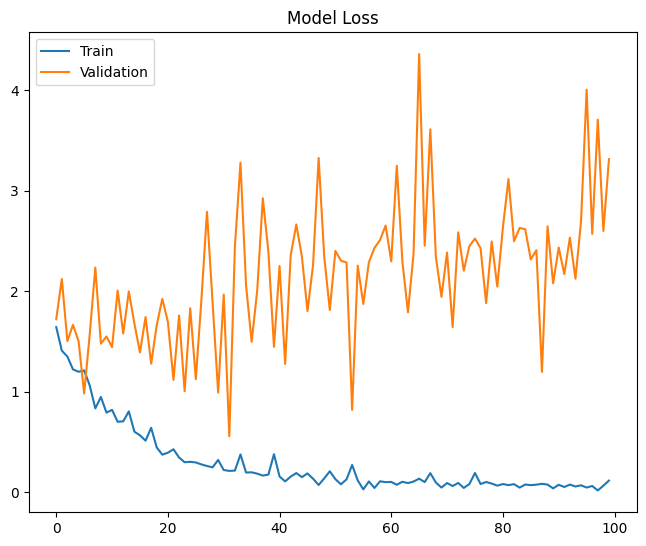

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.25)

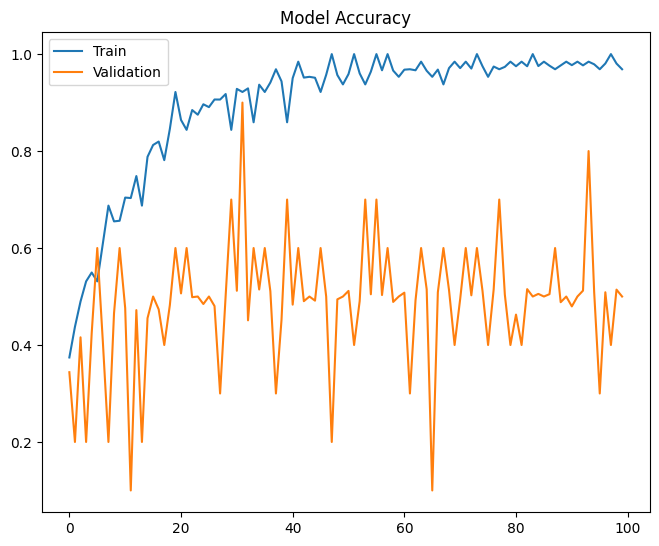

In [79]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.25)

In [80]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)